# Curve fitting

this notebook goes through the process of implementing a simple Gaussian Elimination routine to solve a set of linear equations

$$
\mathbf{A}\mathbf{x} = \mathbf{b}
$$

that occurs in the polynomical curve fitting problem

accompanies the lecture at
https://mattatlincoln.github.io/teaching/numerical_methods/lecture_3/#/

In [ ]:
# use numpy library and shorted its name in this workbook to np
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#We need this function everywhere. Tidies up having it at top you get the vibe
def gaussElim(A,b):
    """
    Routine to solve problem Ax = b using gauss elim.
    A is an NxN matrix, b a column vector of size N
    returns x vector of dimentsion N
    """
    # setup our augmented matrix by copying A and b
    N = A.shape[0]
    augmat = np.zeros((N, N+1))
    augmat[:,:N] = np.copy(A)
    augmat[:,N] = np.copy(b)
    
    for pivot in range(0,N):
        refrow = pivot
        for row in range(refrow+1, N):
            ratio =  augmat[row,refrow]/augmat[refrow,refrow]
            for col in range(refrow, N+1):
                augmat[row,col] = augmat[row,col] - augmat[refrow,col]*ratio
    #print(augmat)
    x = np.zeros(N)
    for row in range(N-1,-1,-1):
        x[row] = augmat[row,N] 
        for col in range(row+1, N):
            x[row] -= augmat[row,col]*x[col] 
        x[row] = x[row]/augmat[row,row]       
    print(x)

## Tidy up our Gaussian Elimination routines

we'll set up A and b separately this time and convert our sprawling code to use an extra set of loops.
We'll also make it into a function that can be called:

In [ ]:
# setup an augmented matrix to represent our set of linear equations
dimension = 4
matdim = (dimension, dimension)
A = np.zeros(matdim)
b = np.zeros(dimension)

In [ ]:
A

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

For now we will just fill in the required entries by hand. Make sure you are ok with the indexing.
We will use the example in the lecture
https://mattatlincoln.github.io/teaching/numerical_methods/lecture_2/#/2

In [ ]:
# first row
A[0,0] = 2
A[0,1] = 2
A[0,2] = 4
A[0,3] = -2
b[0] = 10.0

In [ ]:
# second row
A[1,0] = 4
A[1,1] = 3
A[1,2] = 2
A[1,3] = 4
b[1] = 17.0

In [ ]:
# third row
A[2,0] = 3
A[2,1] = 1
A[2,2] = 3
A[2,3] = 1
b[2] = 18.0

In [ ]:
# fourth row
A[3,0] = 1
A[3,1] = 3
A[3,2] = 4
A[3,3] = 2
b[3] = 27.0

In [ ]:
# check we've got it right
print(A, b)

[[ 2.  2.  4. -2.]
 [ 4.  3.  2.  4.]
 [ 3.  1.  3.  1.]
 [ 1.  3.  4.  2.]] [10. 17. 18. 27.]


In [ ]:
gaussElim(A,b)

[-1.64705882 -3.          7.11764706  4.58823529]


## General Curve Fitting
Suppose we have 11 measurements at
xT=[−3.,−2.3,−1.6,−0.9,−0.2,0.5,1.2,1.9,2.6,3.3,4.0]
with measured values
yT=[8.26383742,6.44045188,4.74903073,4.5656476,3.61011683,3.32743918,2.9643915,1.02239181,1.09485138,1.84053372,1.49110572]

Let us fit it to a model of the form yi=a0⋅1+a1e−xi+a2e−2xi

In [ ]:
x = np.array([-3.0,-2.3,-1.6,-0.9,-0.2,0.5,1.2,1.9,2.6,3.3,4.0])
x
y = np.array([8.26383742,6.44045188,4.74903073,4.5656476,3.61011683,3.32743918,2.9643915,1.02239181,1.09485138,1.84053372,1.49110572])
y

array([8.26383742, 6.44045188, 4.74903073, 4.5656476 , 3.61011683,
       3.32743918, 2.9643915 , 1.02239181, 1.09485138, 1.84053372,
       1.49110572])

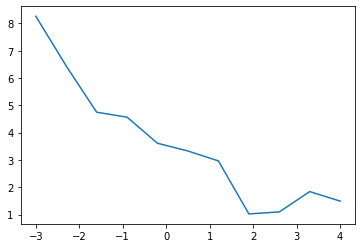

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
z = np.zeros((11,3))
z

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# fill in first column of z
for i in range(11):
  z[i,0] = 1.0
  z[i,1] = np.exp(-x[i])
  z[i,2] = np.exp(-2*x[i])

z

array([[1.00000000e+00, 2.00855369e+01, 4.03428793e+02],
       [1.00000000e+00, 9.97418245e+00, 9.94843156e+01],
       [1.00000000e+00, 4.95303242e+00, 2.45325302e+01],
       [1.00000000e+00, 2.45960311e+00, 6.04964746e+00],
       [1.00000000e+00, 1.22140276e+00, 1.49182470e+00],
       [1.00000000e+00, 6.06530660e-01, 3.67879441e-01],
       [1.00000000e+00, 3.01194212e-01, 9.07179533e-02],
       [1.00000000e+00, 1.49568619e-01, 2.23707719e-02],
       [1.00000000e+00, 7.42735782e-02, 5.51656442e-03],
       [1.00000000e+00, 3.68831674e-02, 1.36036804e-03],
       [1.00000000e+00, 1.83156389e-02, 3.35462628e-04]])

In [ ]:
Zt = z.transpose()
Zt

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.00855369e+01, 9.97418245e+00, 4.95303242e+00, 2.45960311e+00,
        1.22140276e+00, 6.06530660e-01, 3.01194212e-01, 1.49568619e-01,
        7.42735782e-02, 3.68831674e-02, 1.83156389e-02],
       [4.03428793e+02, 9.94843156e+01, 2.45325302e+01, 6.04964746e+00,
        1.49182470e+00, 3.67879441e-01, 9.07179533e-02, 2.23707719e-02,
        5.51656442e-03, 1.36036804e-03, 3.35462628e-04]])

In [ ]:
ZtZ = np.dot(Zt,z)
ZtZ

array([[1.10000000e+01, 3.98805235e+01, 5.35475292e+02],
       [3.98805235e+01, 5.35475292e+02, 9.23382518e+03],
       [5.35475292e+02, 9.23382518e+03, 1.73292733e+05]])

In [ ]:
Zty = np.dot(Zt,y)
Zty

array([  39.36979777,  272.62352762, 4125.63080286])

In [ ]:
X = gaussElim(ZtZ,Zty)
X

[ 2.01123234  0.68962611 -0.01915384]


In [ ]:
xnumpy = np.linalg.solve(ZtZ,Zty)
xnumpy

array([ 2.01123234,  0.68962611, -0.01915384])

X is our soln to the least squares problem asnd means our model is $y = 2.011 + 0.6896e^{-x_i) - 0.019e^{-2x_i}$

<function matplotlib.pyplot.show(*args, **kw)>

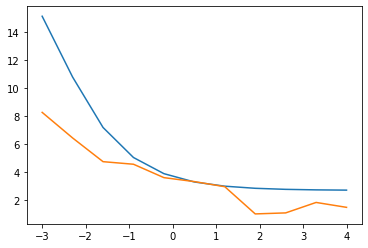

In [ ]:
ynumpy = np.zeros(11)
for i in range(11):
  ynumpy[i] = 2.011+(0.6896+np.exp(-x[i]))-(0.019*np.exp(-2*x[i]))

plt.plot(x, ynumpy)
plt.plot(x,y)
plt.show